# 1. 라이브러리 불러오기

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'tensorflow'

# 2. 데이터 블러오기

In [ ]:
# 훈련용(train), 평가용(test)
(train_images,train_labels), (test_images,test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# 훈련용 데이터 확인
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
# 평가용 데이터 확인
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

# 3. 데이터와 정답이 정확하게 일치하는지 확인

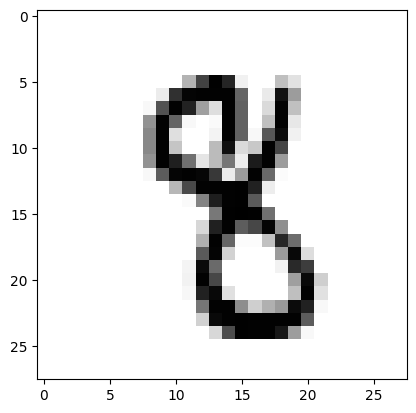

In [ ]:
plt.imshow(train_images[49999], cmap='Greys')

In [ ]:
train_labels[49999]

8

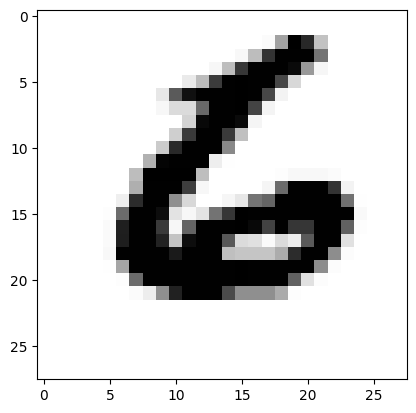

In [ ]:
plt.imshow(test_images[9999], cmap='Greys')

In [ ]:
test_labels[9999]

6

# 4. 데이터 전처리 하기(reshape)

In [ ]:
# reshape로 만들 데이터파일
# train_images.shape -> (60000, 28, 28) 를 reshape를 통해서 (60000, 28, 28, 1)
# test_images.shape -> (10000, 28, 28) 를 reshape를 통해서 (10000, 28, 28, 1)
train_images = train_images.reshape((60000, 28, 28, 1))

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
test_images.shape

(10000, 28, 28, 1)

In [ ]:
# 0~ 255 값을 0~1 사이로 표준화 작업
train_images, test_images = train_images / 255.0, test_images / 255.0

# 5. 신경망 모델 설계하기

In [ ]:
# keras의 모델을 설계하는 방법
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [ ]:
# pyplot으로 모델 확인
plot_model(model, show_shapes=True, dpi=80)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# 6. 모델 컴파일 하기

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

# 7. 모델 훈련 하기

In [ ]:
history = model.fit(train_images,train_labels,batch_size=16, epochs=10, verbose=1,validation_data=(test_images,test_labels))

Epoch 1/10
3750/3750 [==============================] - 41s 11ms/step - loss: 0.1847 - accuracy: 0.9431 - val_loss: 0.0809 - val_accuracy: 0.9747
Epoch 2/10
3750/3750 [==============================] - 39s 10ms/step - loss: 0.0672 - accuracy: 0.9784 - val_loss: 0.0564 - val_accuracy: 0.9818
Epoch 3/10
3750/3750 [==============================] - 36s 10ms/step - loss: 0.0497 - accuracy: 0.9846 - val_loss: 0.0549 - val_accuracy: 0.9825
Epoch 4/10
3750/3750 [==============================] - 38s 10ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.0448 - val_accuracy: 0.9859
Epoch 5/10
3750/3750 [==============================] - 40s 11ms/step - loss: 0.0296 - accuracy: 0.9907 - val_loss: 0.0439 - val_accuracy: 0.9879
Epoch 6/10
3750/3750 [==============================] - 38s 10ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.0647 - val_accuracy: 0.9811
Epoch 7/10
3750/3750 [==============================] - 38s 10ms/step - loss: 0.0198 - accuracy: 0.9940 - val_loss: 0.0604 -

# 8. 훈련결과 분석하기

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

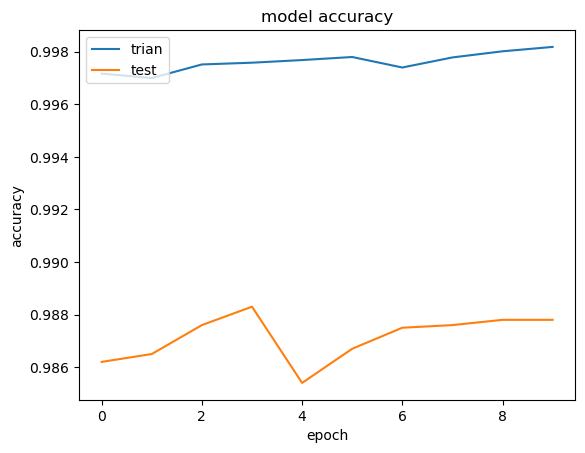

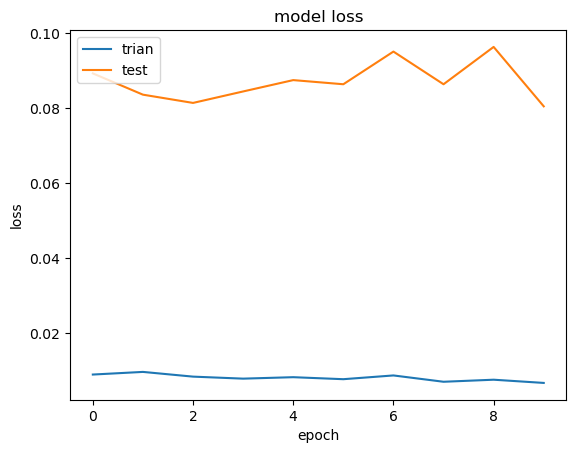

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['trian','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['trian','test'], loc='upper left')
plt.show()

# 9. 모델 평가하기

In [ ]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.0933 - accuracy: 0.9849 - 1s/epoch - 3ms/step


In [ ]:
acc

0.9848999977111816

# 10. 예측하기

In [ ]:
result = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
result[9999]

array([2.5884046e-16, 2.1015223e-12, 8.8038303e-21, 7.9199467e-17,
       5.2467457e-15, 8.0603364e-09, 1.0000000e+00, 1.9582526e-26,
       1.8498864e-14, 8.1172162e-21], dtype=float32)

In [ ]:
# 가장 높은 활률의 배열 위치를 찾는 명령
result_value = np.argmax(result[9999])
print("예측 결과값 = %d" % (result_value))

예측 결과값 = 6


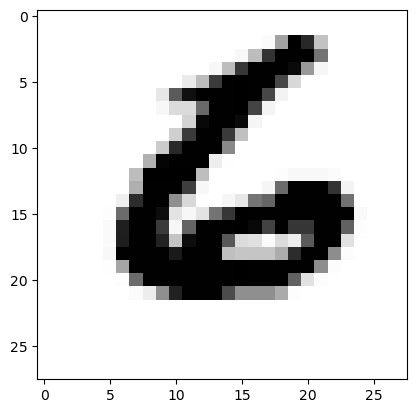

In [ ]:
plt.imshow(test_images[9999], cmap='Greys')

In [ ]:
test_labels[9999]

6

# 11. 실제 데이터 파일로 검증하기

In [ ]:
from PIL import Image, ImageOps

In [ ]:
image = Image.open('4.jpg')
image = image.convert('L')

In [ ]:
data = np.ndarray(shape=(1, 28, 28, 1), dtype=np.float32)
size = (28, 28)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

image_array = np.asarray(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data = normalized_image_array

img_data = data.reshape(1, 28, 28, 1)
img_data.shape
# data[0] = normalized_image_array


C:\Users\koreavc1\anaconda3\envs\p37_crawling\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(1, 28, 28, 1)

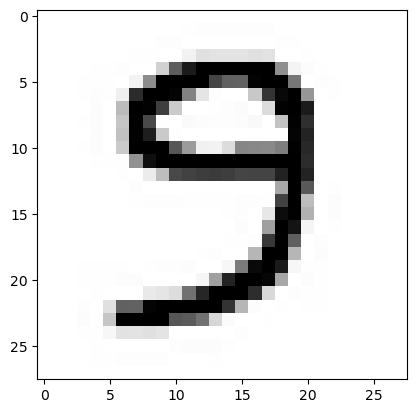

In [ ]:
plt.imshow(data, cmap='Greys')

In [ ]:
real_result = model.predict(img_data)

1/1 [==============================] - 0s 23ms/step


In [ ]:
real_result

array([[4.2099484e-07, 6.5625214e-04, 5.6258863e-04, 4.0246214e-06,
        1.2551583e-03, 6.3373272e-06, 3.2683820e-10, 7.2078747e-01,
        1.5849768e-01, 1.1823006e-01]], dtype=float32)

In [ ]:
# 가장 높은 활률의 배열 위치를 찾는 명령
real_value = np.argmax(real_result)
print("예측 결과값 = %d" % (real_value))

예측 결과값 = 7


In [ ]:
# 모델 저장하기
model.save('mnist_cnn.h5')